#  <span style="color:darkblue"> Ordinary Differential Equations, Boundary Value Problems </span>

<hr style="border:6px solid black"> </hr>

# <span style="color:darkblue"> Learning Objectives </span>

### ODE boundary value problems (BVPs)
- Be able to distinguish bewteen ODE IVPs and BVPs
- Be able to formulate three common types of boundary conditions: Dirichlet, Neumann, Robin

### Finite difference method (FDM)
- Be able to derive forward, backward, and centered finite difference approximations for the first derivatives
- Be able to derive centered finite difference approximations for the second derivatives
- Be able to state the truncation errors for different finite difference approximations

### Solving ODE BVPs
- Demonstrate the ability to discretize ODE BVPs into a set of algebraic equations
- Be able to deal with Dirichlet boundary conditions
- Be able to deal with Neumann and Robin boundary conditions by making fictious nodes
- Solve algebraic equations using appropriate numerical methods (Gauss-Siedel for linear systems or Newton-Raphson for nonlinear systems)

### Solving coupled BVPs*
- Be able to solve coupled BVPs by interlacing the unknown dependent variables
- Be able to identify the bandwidth of the Jacobin matrix of the reformulated equations

*  Not covered in tutorial

<hr style="border:6px solid black"> </hr>

<div class="alert alert-block alert-warning">
<b>INTERACTIVE!</b> Before starting this example, import the <b>Plots.jl</b> library by running the cell below.
</div>

In [1]:
import Pkg; Pkg.add("Plots"); using Plots

    Updating registry at `C:\Users\stub0\.julia\registries\General.toml`


   Resolving

 package versions...


  No Changes to `C:\Users\stub0\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\stub0\.julia\environments\v1.7\Manifest.toml`


In the last tutorial, we introduced the general ODE form,

\\[F\left(x,y,\frac{dy}{dx},\frac{d^2y}{dx^2},\ldots,\frac{d^ny}{dx^n}\right)=0,\\]

which when combined with initial conditions, formed the ODE-IVP problem, that we then proceeded to solve.

In this unit, we consider ODE problems in which $n$ auxiliary conditions are specified at different values of the independent variable $x$ rather than just the specification of the initial condition. Such conditions are termed boundary conditions and the resulting problems are called boundary value problems (BVPs). In most of the problems of interest in chemical engineering the ODE will be of the form,

\\[\frac{d^2y}{dx^2}=f\left(x,y,\frac{dy}{dx}\right),\\]

where $x$ belongs to an interval $[x_l,x_r]$. The positions $x=x_l$ and $x=x_r$ define the boundaries of the spatial domain of interest. The three common types of boundary conditions are as follows:
- **Dirichlet** (boundary condition of the first kind): For this type, we specify the value of $y$ on the boundary, e.g. $y(x_l)=\alpha$.
- **Neumann** (boundary condition of the second kind): For this type, we specify the derivative of $y$ on the boundary, e.g. $\left. \frac{dy}{dx} \right |_{x_l} = \alpha$.
- **Robin** (boundary condition of the third kind): This type involves a combination of $y$ and the derivative of $y$ on the boundary, e.g. $\alpha_1 \frac{dy}{dx} + \alpha_2 y(x_r) = \alpha_3$.

## Finite Difference Method
The finite difference method is a common approach for solving ODE-BVPs. The first step to apply the finite difference method, is to discretize the spatial domain. This begins by defining $n$ (often equidistant) nodes $x_1,\ldots,x_n$. The discretization step is then given by

\\[\Delta x = \frac{x_r-x_l}{n-1}.\\]

First-order derivatives and second-order derivatives appearing in $F$ will be replaced with finite difference approximations. Common finite difference approximations for the first-order derivatives are list below.
- Forward difference approximation: $\left.\frac{dy}{dx}\right |_{x_i}=\frac{y_{i+1}-y_i}{\Delta x}$ 
- Backward difference approximation: $\left.\frac{dy}{dx}\right |_{x_i}=\frac{y_{i}-y_{i-1}}{\Delta x}$ 
- Centered finite difference approximation: $\left.\frac{dy}{dx}\right |_{x_i}=\frac{y_{i+1}-y_{i-1}}{2\Delta x}$
The centered finite difference approximation is the most common finite difference approximation used for second-order derivatives and is defined as

\\[\left.\frac{d^2y}{dx^2}\right |_{x_i}=\frac{y_{i+1} +2y_i -y_{i-1}}{\Delta x^2}.\\]

## Solving ODE-BVPs
After the spatial discretization and the derivation of the finite difference approximations, we can proceed with the transformation of the ODE-BVP into a set of algebraic equations. At each interior node, we use the centered finite difference approximations to convert the ODE $\frac{d^2y}{dx^2}=f(x,y,\frac{dy}{dx})$ into the discretized form

\\[\frac{y_{i+1} - 2y_i +y_{i-1}}{\Delta x^2}=f(x_i,y_i,\frac{y_{i+1} - y_{i-1}}{2 \Delta x}).\\]

The result is a set of algebraic equations in $n-2$ unknowns. The remaining two equations will come from the boundary conditions. The resulting set of (in general, nonlinear) algebraic equations will have to be solved simultaneously to obtain the values of the unknowns. An outline for general approach to solving BVPs is:
1. Discretize the domain into n nodes.
2. For the interior nodes, discretize the ODE using finite difference approximations of the derivatives.
3. For the boundary nodes, if there is a Dirichlet boundary, set the boundary node to the specified value. Otherwise, make a fictitious node and discretize both the boundary condition and the ODE.
4. If the problem is linear, solve using any method the resulting system $\mathbf A \mathbf x = \mathbf b$. If the problem is nonlinear, form the Jacobian and solve by Newton–Raphson.
5. Check for mesh refinement.

When solving ODE-BVPs, it is very important to apply the appropriate procedure for dealing with each different of type of **boundary condition**.
When a **Dirichlet** boundary condition is present, the value of the boundary node is a specified, e.g. if we have $y(x_l)=\alpha$, then we set $y_1=\alpha$.
When a **Neumann** and **Robin** boundary conditions with a derivative term is present, extra consideration is merited. When using the centered finite difference method for approximations, a fictious node should be introduced in order to to keep the same level of accuracy at the boundary. 
Consider a Neumann boundary condition at the left boundary $\left. \frac{dy}{dx} \right |_{x_l} = \alpha$, we need to introduce a fictious node $x_0$ on the left of $x_l$, with a corresponding value of $y(x=x_0)=y_0$. Subsequently, we implement the centered finite difference approximation of the boundary condition:

\\[\frac{y_2-y_1}{2\Delta x} = \alpha,\\]

which we can solve for the value of the fictitious node,

\\[y_0 = y_2 - 2 \alpha \Delta x.\\]

We now substitute this result into the differential equation at $x_1$.

## Case Study: Laminar Flow
Suppose we have laminar flow of water, at 20 °C, through a horizontal cylindrical tube.


<img src="pipe1.png" width="600">


Assume that we only consider the kinematics in the z-direction, and the flow is fully developed and at steady state. Then we can have the equation:

\\[0=-\frac{\partial P}{\partial z} + \mu \left [ \frac{1}{r} \frac{\partial}{\partial r} \left(r \frac{\partial u_z}{\partial r} \right) \right ]. \\]

We can rearrange and simplify the above equation as

\\[\frac{1}{r} \frac{\partial u_z}{\partial r} + \frac{\partial^2 u_z}{\partial r^2} = \frac{1}{\mu} \frac{\partial P}{\partial z}.\\]

The viscosity of water at $20 ^\circ \text C$ is $\mu = 8.9\times 10^{-4} \; \text{Pa} \cdot \text s$, and the pressure drop through the pipe is $\frac{\partial P}{\partial z} = -1000 \; \text{Pa}/\text{m}$. We plug in this information and the equation simplifed to

\\[\frac{1}{r} \frac{\partial u_z}{\partial r} + \frac{\partial^2 u_z}{\partial r^2} = \frac{-1000}{8.9\times 10^{-4}}.\\]

At the inner surface of the pipe, a no-slip boundary condition holds, which is a Dirichlet condition:

\\[u_z|_{r=R} = 0.\\]

At the center of the pipe, a no-flux boundary condition holds due to symmetry, which is a Neumann condition:

\\[\left. \frac{du_z}{dr} \right |_{r=0} = 0.\\]

We may now solve for the $z$-direction velocity $u_z$ profile.


## Solution:
We first discretize the spatial domain into $n$ nodes, $r_1,\ldots,r_n$, with step size $\Delta r =R/(n-1)$.


<img src="pipe2.png" width="600">


Then, we use centered finite difference approximations for the derivative terms at each interior node:

\\[\left. \frac{d u_z}{dr} \right|_{r_i} \approx \frac{u_{z,i+1} - u_{z,i-1}}{\Delta r},\\]

\\[\left. \frac{d^2 u_z}{dr^2} \right|_{r_i} \approx \frac{u_{z,i+1} - 2 u_{z,i} + u_{z,i-1}}{\Delta r^2}.\\]

Thus, the equations for interior nodes become

\\[\frac{1}{r_i} \frac{u_{z,i+1} - u_{z,i-1}}{\Delta r}+\frac{u_{z,i+1} - 2 u_{z,i} + u_{z,i-1}}{\Delta r^2}=\frac{-1000}{8.9\times 10^{-4}}.\\]

For the boundary nodes, at $r=R$ where the Dirchlet boundary condition is applied, we have

\\[u_{z,n}=0.\\]

At $r=0$ where the Neumann boundary condition is applied, a fictious node $u_{z,0}$ is introduced, thus we have

\\[\frac{u_{z,2}-{u_{z,0}}}{\Delta r}=0.\\]

Solving for the fictious node, we get $u_{z,0} = u_{z,2}$. The equation for the first node has to be modified because the radius is equal to zero at that node. We apply L’Hôpital’s rule:

\\[\lim_{r \to 0} \frac{1}{r} \frac{d u_z}{dr} = \lim_{r \to 0} \frac{\frac{d}{dr}\left(\frac{du_z}{dr}\right)}{\frac{d}{dr}(r)} = \lim_{r\to 0}\frac{d^2 u_z}{dr^2}.\\]

So the equation at $r=0$ becomes $2\frac{d^2 u_z}{dr^2} = \frac{-1000}{8.9\times 10^{-4}}$.
We apply centered finite differencing and plug the fictious node into the first equation to obtain

\\[2\cdot\frac{2u_{z,2}-2u_{z,1}}{\Delta r^2}=\frac{-1000}{8.9\times 10^{-4}}. \\]

Now, we have a system of linear equations $\mathbf A \mathbf u_z =\mathbf b$ and we can solve for the velocity profile.

In [2]:
# process specifications and constants
mu = 8.9e-4                          # Pa*s
dPdz = -1000                         # Pa/m
delta_r = 0.001                      # m
r = range(0.0, 0.05, step = delta_r) # m
println("done")

done

<div class="alert alert-block alert-warning">
<b>INTERACTIVE!</b> Now, we enter the discretized system of linear algebraic equations in matrix-vector form.
You should write the equation for the first node (center of the pipe) by yourself..
</div>

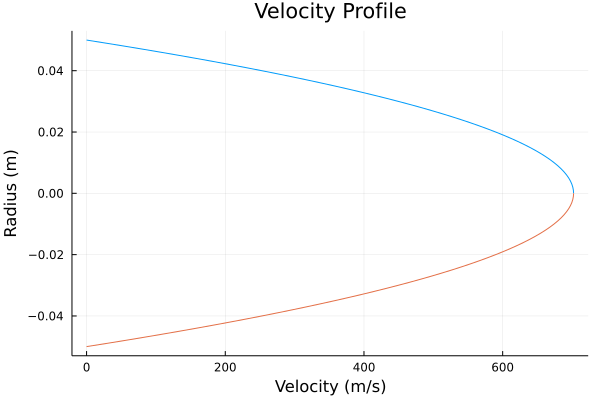

In [3]:
# creating a matrix and vector for the equations
n = length(r)
A = zeros(n,n)
b = zeros(n)

### FILL IN THE ENTRIES OF A[1,i] and b[1] for i = 1,...,n by yourself here ###
A[1,1] = -4/delta_r^2
A[1,2] = 4/delta_r^2
b[1] = -1000/8.9e-4

# interior nodes
for i = 2:n-1
    A[i,i-1] = -1/(r[i]*2*delta_r) + 1/delta_r^2
    A[i,i] = -2/delta_r^2
    A[i,i+1] = 1/(r[i]*2*delta_r) + 1/delta_r^2
    b[i] = dPdz/mu
end

# last node
A[n,n] = 1
b[n] = 0

# solving the matrix for the velocity profile
u = A\b

# plot of velocity profile
plt = plot(u,r,label="")
plot!(plt,u,-r,label="", title= "Velocity Profile")
xlabel!("Velocity (m/s)")
ylabel!("Radius (m)")

<hr style="border:6px solid black"> </hr>

# <span style="color:darkblue">  Questions for reflection </span> 

- How can you tell if the spatial discretization chosen for this example was small enough?
- In general, a number of higher-order spatial discretizations may be used when discretizing a problem (see [slide 9 here](https://www.mathematik.uni-dortmund.de/~kuzmin/cfdintro/lecture4.pdf)). What potential trade-offs may occur when using a higher-order accuracy scheme to discretize the problem solved in the=is tutorial? 